# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Cleaning & Processing

In [2]:
df = pd.read_csv("data-export (1).csv")    # Loading the dataset.

In [3]:
df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [4]:
df.columns = df.iloc[0]     # Deleting the existing column header.
df = df.drop(index = 0).reset_index(drop = True)   # Making first row as the column header.
df.columns = ["Channel group", "Datehour", "Users", "Sessions", "Engaged Sessions", "Avg Engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]  # renaming the column header.

In [5]:
df.head(5)

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Avg Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Channel group                    3182 non-null   object
 1   Datehour                         3182 non-null   object
 2   Users                            3182 non-null   object
 3   Sessions                         3182 non-null   object
 4   Engaged Sessions                 3182 non-null   object
 5   Avg Engagement time per session  3182 non-null   object
 6   Engaged sessions per user        3182 non-null   object
 7   Events per session               3182 non-null   object
 8   Engagement rate                  3182 non-null   object
 9   Event count                      3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
# Converting datatype of the columns.
df["Datehour"] = pd.to_datetime(df["Datehour"], format= "%Y%m%d%H", errors = 'coerce')  # Converting datatype of Datehour column.  
numeric_cols = df.columns.drop(["Channel group", "Datehour"]) 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')   # Converting every columns except Datehour and Channel group datatype into numeric.
df["Hour"] = df["Datehour"].dt.hour    # Making a new column from Datehour data.

In [8]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Avg Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Channel group                    3182 non-null   object        
 1   Datehour                         3182 non-null   datetime64[ns]
 2   Users                            3182 non-null   int64         
 3   Sessions                         3182 non-null   int64         
 4   Engaged Sessions                 3182 non-null   int64         
 5   Avg Engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user        3182 non-null   float64       
 7   Events per session               3182 non-null   float64       
 8   Engagement rate                  3182 non-null   float64       
 9   Event count                      3182 non-null   int64         
 10  Hour                             3182 non-null   int64      

In [10]:
df.describe()

,Users,Sessions,Engaged Sessions,Avg Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
std,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000


# Exploratory Data Analysis [EDA]

In [11]:
# Sessions and Users over Time
sns.set(style="whitegrid")

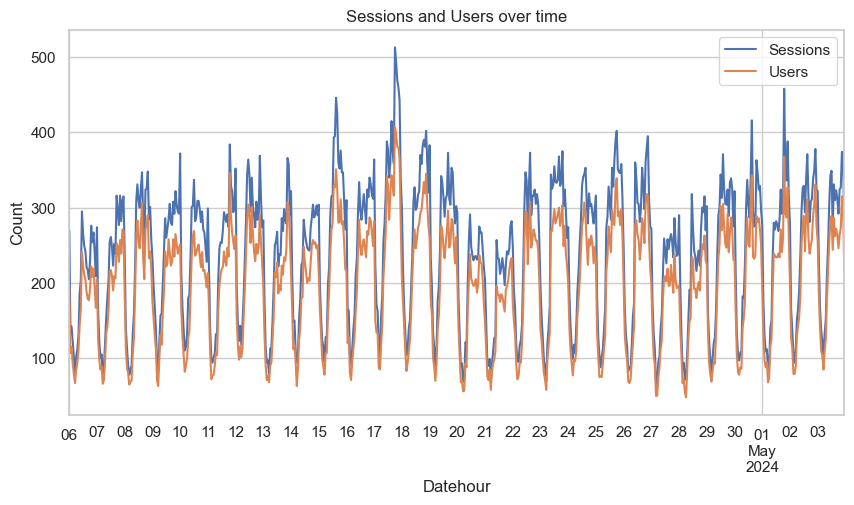

In [12]:
# Plotting a line chart for Sessions and Users over time.
plt.figure(figsize=(10,5))
df.groupby("Datehour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("Datehour")
plt.ylabel("Count")
plt.show()

# Total Users by Channels

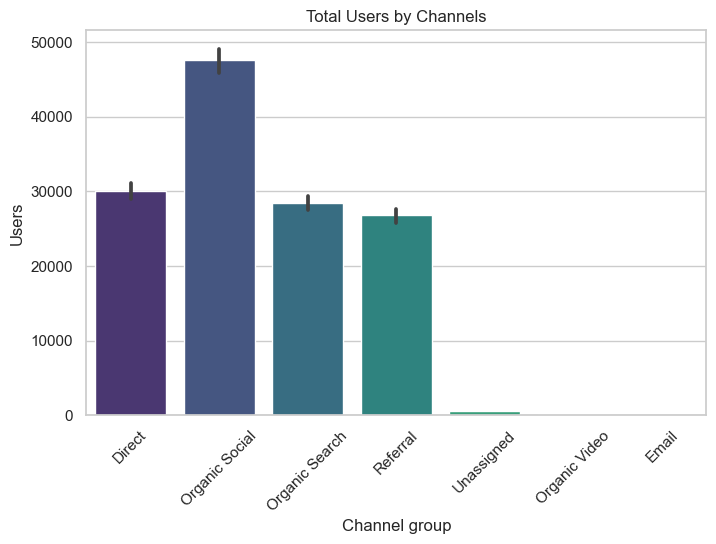

In [13]:
# Plotting a bar graph for Users and Channels.
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channels")
plt.xticks(rotation=45)
plt.show()

# Average engagement time by Channel group

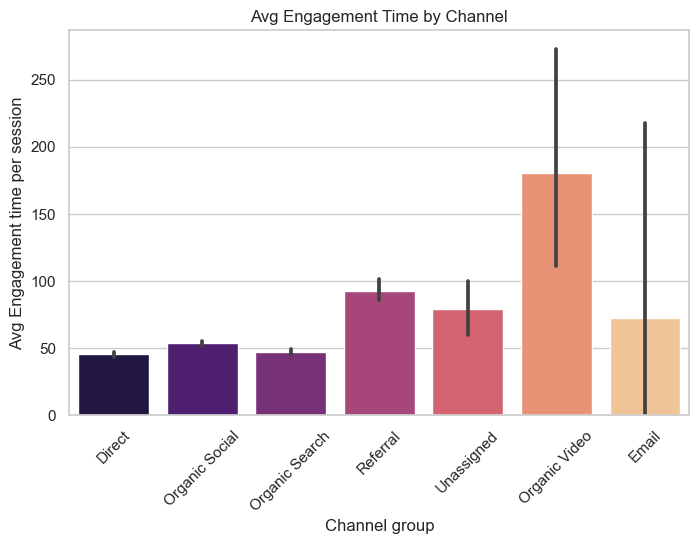

In [14]:
# Plotting a bar graph for avg. engagement time and Channel group.
plt.figure(figsize =(8,5))
sns.barplot(data=df, x="Channel group", y="Avg Engagement time per session", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

# Engagement rate Distribution by Channel

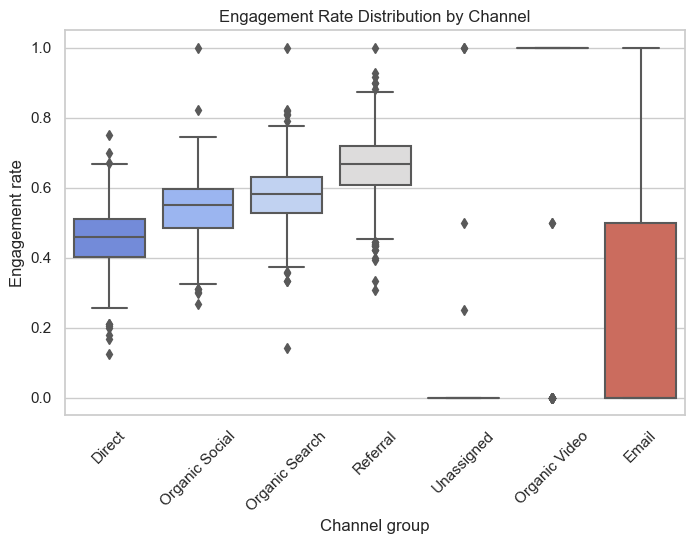

In [15]:
# Plotting box plot graph for engagement rate distribution and Channel.
plt.figure(figsize =(8,5))
sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette ="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non engaged sessions

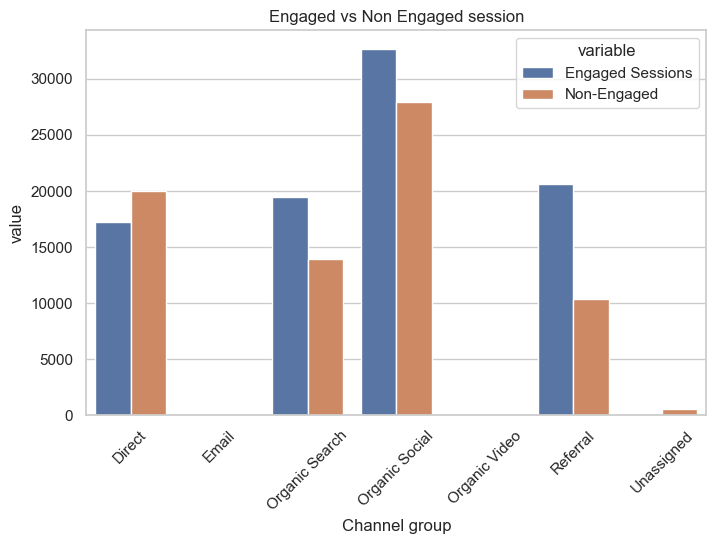

In [16]:
# Making new data for the bar plot.
session_df = df.groupby("Channel group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars= "Channel group", value_vars= ["Engaged Sessions", "Non-Engaged"])

# Plotting bar plot for Engaged vs. Non engaged Sessions.
plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non Engaged session")
plt.xticks(rotation=45)
plt.show()

# Tarffic by hours and Channel

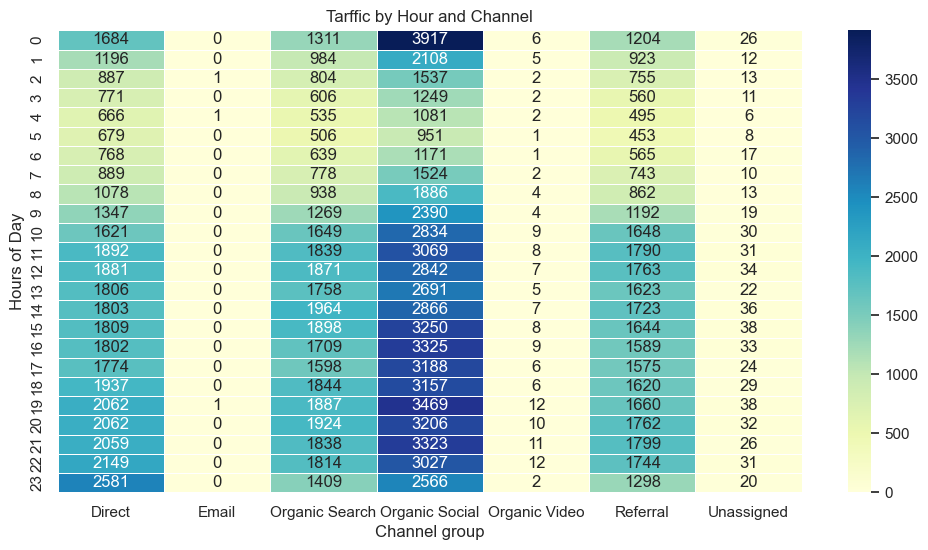

In [17]:
# Plotting Heat map for analyising of traffic of Hours and Channels.
heatmap_data = df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Tarffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hours of Day")
plt.show()

# Engagement rate vs Sessions over time

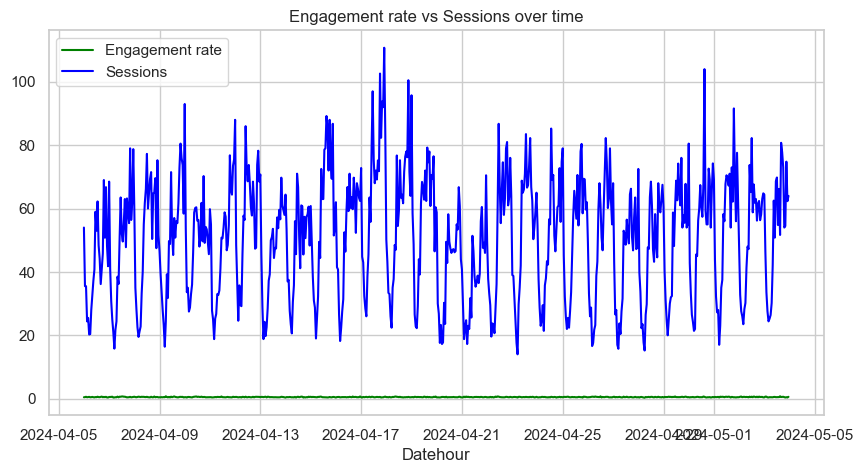

In [18]:
# Plotting line chart for engagement rate and Sessions over time.
df_plot = df.groupby("Datehour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["Datehour"], df_plot["Engagement rate"], label = "Engagement rate", color="green")
plt.plot(df_plot["Datehour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement rate vs Sessions over time")
plt.xlabel("Datehour")
plt.legend()
plt.grid(True)
plt.show()